In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [15]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
mask = data.isnull().any(axis=1) 
print(mask)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool


In [17]:
data_clean = data[~mask] # remove rows with missing data

In [18]:
data_clean = data_clean.reset_index()

In [19]:
data_clean.shape

(712, 12)

In [20]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
data_clean.dtypes

index            int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [22]:
numeric_data = data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]
categorical_data = data_clean[['Name' ,'Embarked' , 'Sex' , 'Ticket']]

In [23]:
data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
707,0,3,39.0,0,5,29.1250
708,0,2,27.0,0,0,13.0000
709,1,1,19.0,0,0,30.0000
710,1,1,26.0,0,0,30.0000


[Text(0, 0, 'Survived'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare')]

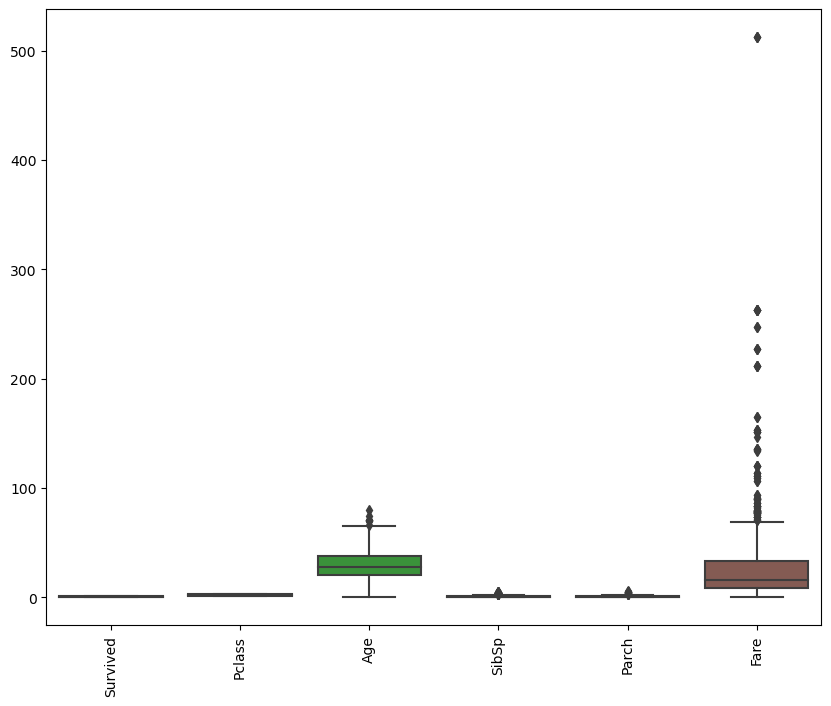

In [24]:
fig , ax = plt.subplots(figsize = (10 , 8))
bp = sns.boxplot(data=numeric_data)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [13]:
# scaler  = StandardScaler()
# scaled_array = scaler.fit_transform(numeric_data)


In [16]:
# scaled_data = pd.DataFrame(scaled_array,columns=numeric_data.columns)
# scaled_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,-0.824163,0.908600,-0.527669,0.522511,-0.506787,-0.516380
1,1.213352,-1.482983,0.577094,0.522511,-0.506787,0.694046
2,1.213352,0.908600,-0.251478,-0.552714,-0.506787,-0.503620
3,1.213352,-1.482983,0.369951,0.522511,-0.506787,0.350326
4,-0.824163,0.908600,0.369951,-0.552714,-0.506787,-0.501257


In [17]:
# scaled_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02,7.120000e+02
mean,-1.610759e-16,-1.587369e-16,2.584933e-16,4.216353e-16,-1.372186e-17,-6.221615e-17
std,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00,1.000703e+00
min,-8.241634e-01,-1.482983e+00,-2.017717e+00,-5.527137e-01,-5.067874e-01,-6.534272e-01
25%,-8.241634e-01,-1.482983e+00,-6.657639e-01,-5.527137e-01,-5.067874e-01,-5.012575e-01
50%,-8.241634e-01,-2.871914e-01,-1.133826e-01,-5.527137e-01,-5.067874e-01,-3.576726e-01
75%,1.213352e+00,9.085997e-01,5.770939e-01,5.225108e-01,6.647471e-01,-2.962586e-02
max,1.213352e+00,9.085997e-01,3.477095e+00,4.823409e+00,6.522419e+00,9.031168e+00


[Text(0, 0, 'Survived'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare')]

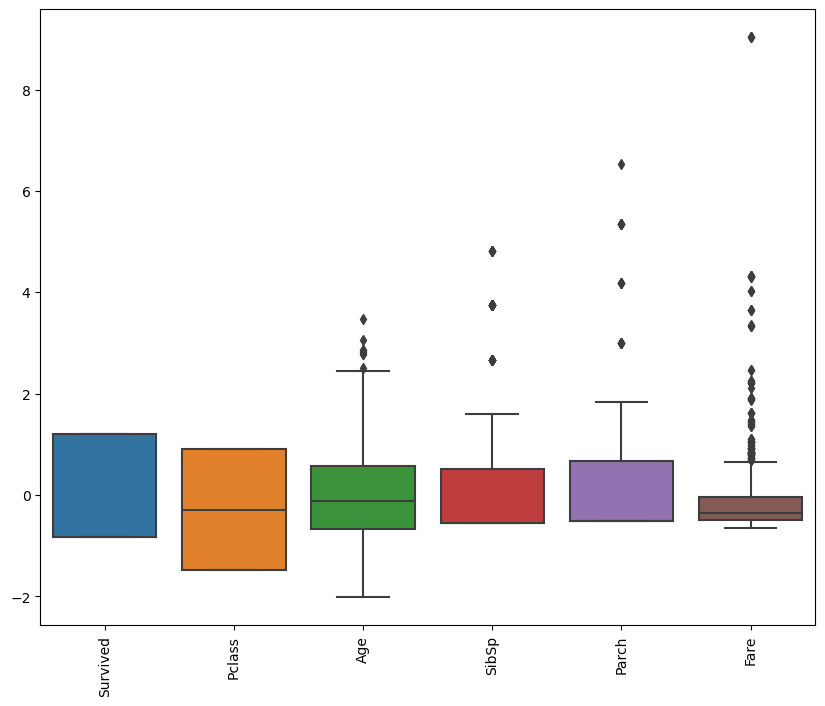

In [18]:
# fig , ax = plt.subplots(figsize = (10 , 8))
# bp = sns.boxplot(data=scaled_data)
# bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [27]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

Survived     1.00
Pclass       2.00
Age         18.00
SibSp        1.00
Parch        1.00
Fare        24.95
dtype: float64


In [28]:
outlires_removed = numeric_data[-((numeric_data < (Q1 - 1.5 * IQR))\
                                 |(numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
outlires_removed.shape

(564, 6)

In [29]:
data_clean = data_clean[-((numeric_data < (Q1 - 1.5 * IQR))\
                                 |(numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [31]:
outlires_removed

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,1,54.0,0,0,51.8625
...,...,...,...,...,...,...
706,0,3,25.0,0,0,7.0500
708,0,2,27.0,0,0,13.0000
709,1,1,19.0,0,0,30.0000
710,1,1,26.0,0,0,30.0000


[Text(0, 0, 'Survived'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare')]

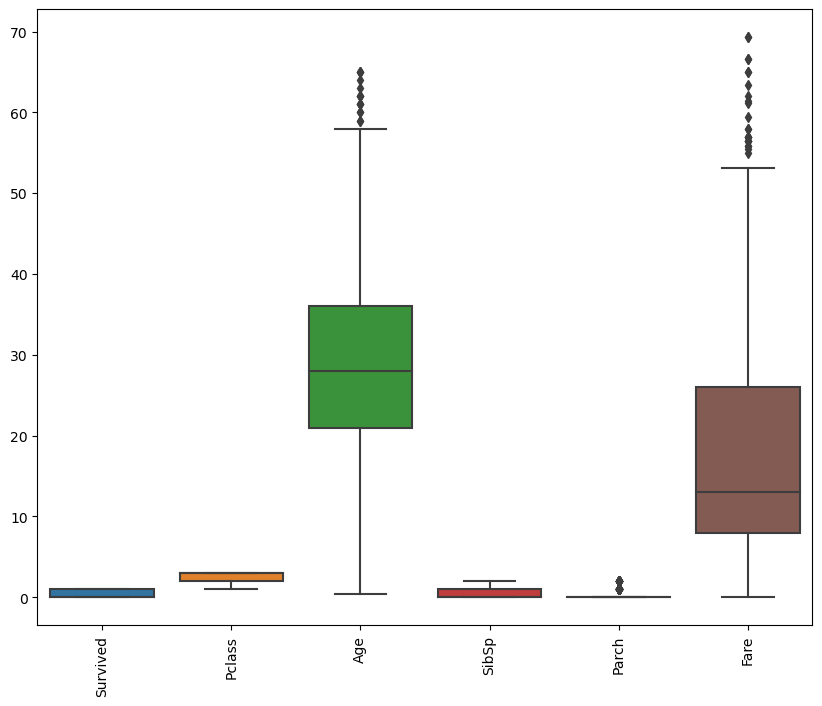

In [32]:
fig , ax = plt.subplots(figsize = (10 , 8))
bp = sns.boxplot(data=outlires_removed)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)

In [33]:
data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']] = outlires_removed[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]

C:\Users\salah barakat\AppData\Local\Temp\ipykernel_11828\978172041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']] = outlires_removed[['Survived' ,'Pclass' , 'Age' , 'SibSp','Parch','Fare']]


In [34]:
data_clean

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
...,...,...,...,...,...,...,...,...,...,...,...,...
706,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
708,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
709,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
710,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [35]:
data_clean.to_csv('titanic_final_cleaned.csv')